*Francisco Pereira [camara@dtu.dk], DTU Management*

# Advanced Business Analytics

## Lecture 1 - Web Data Mining - Part 2: Weather data with API wrappers

In this notebook, we're going to practice data collection from online sources using an API Wrapper. Often, before using directly the classical REST API calls (GET and POST), it is worthwhile looking online to see if someone has created a Python package that does the hard work for us... this is usually called a "Wrapper". 

Particularly, we will use a package call "meteosat" (https://dev.meteostat.net)

### 1. Get the wrapper to work

The wrapper is called meteosat. You need to install it first:

In [5]:
#!pip install meteostat

Let's start working with it. Of course, with the imports relevant for this notebook

In [3]:
# Import Meteostat library and dependencies
from datetime import datetime,  timedelta
import matplotlib.pyplot as plt
from meteostat import Point, Daily, Hourly
import matplotlib.pyplot as plt

We will focus on DTU campus location, for the weather data. For that, we need the coordinates of DTU.  Change this if you want to use another location of your choice

In [4]:
dtu_lat = 55.785797 
dtu_lon = 12.521533

# Create Point for DTU
dtu_location = Point(dtu_lat, dtu_lon)

#### 1.1. Getting current weather

Let's get the weather for today (since midnight)...

In [5]:
# Set time period
start=datetime.today().replace(hour=0, minute=0, second=0) #from midnight
end = datetime.now()

# Get hourly data
data = Hourly(dtu_location, start, end)
data = data.fetch()

# show DataFrame
data

,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
time,,,,,,,,,,,
2022-02-23 01:00:00,3.9,0.9,81.0,0.0,NaN,284.0,35.2,64.8,1003.4,NaN,7.0
2022-02-23 02:00:00,4.0,1.0,81.0,0.0,NaN,289.0,33.3,66.7,1004.6,NaN,4.0
2022-02-23 03:00:00,3.7,1.4,85.0,0.0,NaN,288.0,42.6,79.6,1005.4,NaN,4.0
2022-02-23 04:00:00,3.9,1.6,85.0,0.0,NaN,291.0,35.2,64.8,1006.5,NaN,3.0
2022-02-23 05:00:00,3.9,1.4,84.0,0.0,NaN,292.0,33.3,61.1,1008.2,NaN,3.0
2022-02-23 06:00:00,4.1,2.0,86.0,0.0,NaN,287.0,35.2,68.5,1009.6,NaN,3.0
2022-02-23 07:00:00,4.6,2.1,84.0,0.0,NaN,293.0,33.3,66.7,1011.4,NaN,3.0
2022-02-23 08:00:00,5.3,2.1,80.0,0.0,NaN,293.0,27.8,57.4,1012.9,NaN,2.0
2022-02-23 09:00:00,5.2,2.4,82.0,0.0,NaN,290.0,35.2,63.0,1014.2,NaN,2.0


Pretty neat, right? Notice that we got directly the data in a Pandas DataFrame. This is something that the wrapper does for us (as opposed to us doing it manually, getting all individudal data requests, gathering them, creating the dataframe...)

We can even trivially get averages for today... :-)

In [6]:
data.describe()

,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
count,23.000000,23.000000,23.000000,23.0,0.0,23.000000,23.000000,23.000000,23.000000,0.0,23.000000
mean,5.347826,2.204348,80.260870,0.0,NaN,261.782609,27.947826,53.143478,1012.591304,NaN,2.913043
std,1.154780,0.576414,4.643836,0.0,NaN,29.863259,6.760034,12.309192,4.232978,NaN,1.124643
min,3.700000,0.900000,71.000000,0.0,NaN,216.000000,16.700000,35.200000,1003.400000,NaN,2.000000
25%,4.350000,2.050000,77.000000,0.0,NaN,231.000000,22.250000,42.650000,1010.500000,NaN,2.000000
50%,5.200000,2.400000,82.000000,0.0,NaN,270.000000,27.800000,51.800000,1014.200000,NaN,3.000000
75%,6.400000,2.550000,84.000000,0.0,NaN,289.500000,33.300000,63.900000,1016.050000,NaN,3.000000
max,7.300000,3.000000,86.000000,0.0,NaN,293.000000,42.600000,79.600000,1016.700000,NaN,7.000000


Look outside the window. Is it what you expected? :)

#### 1.3. Getting historical data

Historical weather data is usually more difficult to get for free because it has business value. Fortunately this wrapper offers a lot of data for free, but don't get illuded. This is a rare thing. Often, you have to write code to get data periodically in order not to exceed the limits at once.



Write a code to get all the data from 1-1-1975 to 31-12-2021.

In [7]:
#your code here
#save the retrieved data in a DataFrame called "data"

# Set time period
start = datetime(1975, 1, 1)
end = datetime(2021, 12, 31)

# Get Daily data
data = Daily(dtu_location, start, end)
data = data.fetch()[['tmin', 'tmax', 'tavg', 'prcp', 'wspd', 'wdir', 'pres']]
data=data.dropna()

#we'll add an extra column called "day_since_t0", to make an incremental index of the days through time. 
#This will be useful below a couple of times... 

t0=data.index[0]
data['day_since_t0']=data.apply(lambda x: (x.name-t0).days, axis=1)

Also another thing you need to get used to is to ALWAYS save the data you collected through APIs. In this way, you avoid repeating calls to get the same data (and exceeding your API access limits...)

In [8]:
data.to_csv('dtu_weather.csv')

But let's plot the data that we have (let's just take a look at the daily average temperatures)...

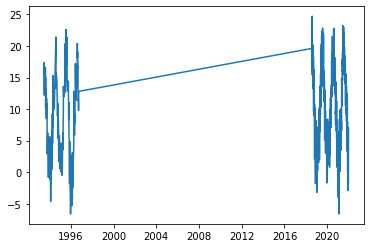

In [9]:
# Plot line chart including average, minimum and maximum temperature
plt.plot(data['tavg'])
plt.show()

hmmm... there's clearly a long gap! :-( 

In fact, it makes the visualization be misleading (this is a common mistake we see in projects, BTW). It is usually wrong to have such a straight line in the graph, because it kind implies that the (missing) data does have a value that falls in that straight line. This is possibly very wrong!

By inspecting the data, we have found that the first block ends on the date of '1996-09-28'

In [10]:
data.loc['2018-08-01'] 

tmin              18.9
tmax              25.2
tavg              22.3
prcp               0.0
wspd              11.1
wdir             328.0
pres            1020.1
day_since_t0    9158.0
Name: 2018-08-01 00:00:00, dtype: float64

In [11]:
data.loc['1996-09-28']

tmin              11.5
tmax              17.6
tavg              12.8
prcp               3.9
wspd              19.9
wdir             255.0
pres            1013.4
day_since_t0    1181.0
Name: 1996-09-28 00:00:00, dtype: float64

[optional] Can you remake the plot such that you remove that straight line?

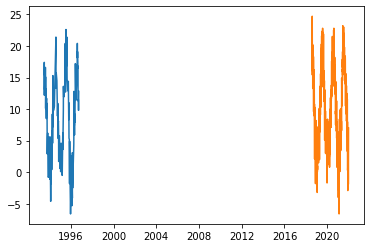

In [12]:
plt.plot(data[data.day_since_t0 <= 1181]['tavg'])
plt.plot(data[data.day_since_t0 >= 9158]['tavg'])
plt.show()

#### 1.4. Analysing temperature increase

[optional just to practice re-reading a dataset] Read the data to dataframe from the "dtu_weather.csv" file. You can use the ```pd.read_csv``` function with the following parameters: ```index_col='time'``` and ```parse_dates=True```.

In [13]:
import pandas as pd

df = pd.read_csv('dtu_weather.csv', index_col='time', parse_dates=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1503 entries, 1993-07-05 to 2021-12-31
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tmin          1503 non-null   float64
 1   tmax          1503 non-null   float64
 2   tavg          1503 non-null   float64
 3   prcp          1503 non-null   float64
 4   wspd          1503 non-null   float64
 5   wdir          1503 non-null   float64
 6   pres          1503 non-null   float64
 7   day_since_t0  1503 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 105.7 KB


An obvious question one asks with such a dataset is whether it shows an increase in mean temperature. The time window is still pretty short (1993-2021) and there's missing data, but one could still make simple test: fit a linear regression model, where:
- x is the number of days (since the first reading)
- y is the average temperature

If there is no temperature change, then the coefficient for x should be very very close to 0, right? Notice that this coefficient will be the amount of average temperature change for each new day. 

Do you want to test this?

In [19]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

#Double brackets for x as it's meant to be a dataframe, not series.
x = data[['day_since_t0']]
y = data['tavg']
lr.fit(x, y)

LinearRegression()

Let's check the coefficients...

In [20]:
lr.coef_

array([0.00014855])

In [21]:
lr.intercept_

8.67138331823181

It is difficult to assess with such a small dataset (and we'd also need to check the t-stats on the beta coefficient - you can use statsmodels for that if you want), but this coefficient seems to imply a systematic, yet very slow, average temperature, consistent with other predictions from complicated models

##### 1.5. Checking other indicators

Let's now check other indicators from the dataset. To simplify, let's focus on the second block of data (i.e. data after the day 1183) 

In [22]:
df=df[df.day_since_t0>1183]

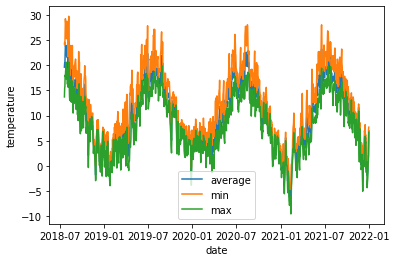

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(df['tavg'], label="average")
plt.plot(df['tmax'], label="min")
plt.plot(df['tmin'], label="max")
plt.legend()
plt.xlabel("date")
plt.ylabel("temperature")
plt.show()

Nothing much surprising, right?


Another interesting couple of features is wind speed and wind direction. For those, polar plots are helpful. Check https://matplotlib.org/gallery/pie_and_polar_charts/polar_demo.html for the details.

Hints:
- polar plots are using radians instead of degrees, so create another column ```'wind_dir_rad'``` using a function from numpy ```np.radians()```
- to align 0 to the north and enforce clock-wise direction, you can use  ```ax.set_theta_zero_location('N')``` and 
```ax.set_theta_direction(-1)``` respectively

Let's do a polar plot with our dataset from DTU

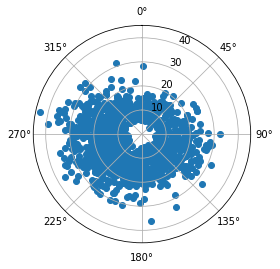

In [24]:
import numpy as np

#df['wind_dir_rad'] = df['wind_dir'].apply(lambda x: np.radians(x))
df['wind_dir_rad'] = np.radians(df['wdir'])

ax = plt.subplot(111, projection='polar')
ax.scatter(df['wind_dir_rad'], df['wspd'])
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
plt.show()

The wind data is a bit scattered. A better representation might be to plot mean and standard deviation for each wind direction. For example, the mean can be computed as 
```
mean = df['wind_spd'].groupby([df['wind_dir_rad']]).mean()
```

Hint: To plot standard deviation, you can plot the two lines corresponding to mean +/- std

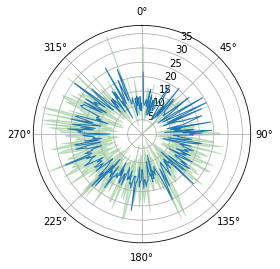

In [26]:
mean = df['wspd'].groupby([df['wind_dir_rad']]).mean()
std = df['wspd'].groupby([df['wind_dir_rad']]).std()
se = 1.0
ub = mean + se * std
lb = mean - se * std
ax = plt.subplot(111, projection='polar')
# plot the shaded range of the confidence intervals
ax.fill_between(ub.index.values, ub, lb, color='green', alpha=.2)
# plot the mean on top
ax.plot(mean, linewidth=1.)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
plt.show()

Generally speaking, it seems that there is more SW wind than the rest. This graph is still a bit spicky and confusing.  Let's try to aggregate data by the 16 main wind directions (North, North-NorthEast, NorthEast, etc). We can use the ```round_degrees()``` function defined below to round the wind direction. Create new column 'wind_dir_agg_rad' in the dataframe using this function.

Sidequest: Can you rewrite this 'ugly' function to make it more 'elegant'?

In [27]:
def round_degrees(val):
    if val >= 348.75 or val < 11.25:
         return 0.0
    elif val >= 11.25 and val < 33.75:
         return 22.5
    elif val >= 33.75 and val < 56.25:
         return 45.0
    elif val >= 56.25 and val < 78.75:
         return 67.5
    elif val >= 78.75 and val < 101.25:
         return 90.0
    elif val >= 101.25 and val < 123.75:
         return 112.5
    elif val >= 123.75 and val < 146.25:
         return 135.0
    elif val >= 146.25 and val < 168.75:
         return 157.5
    elif val >= 168.75 and val < 191.25:
         return 180.0
    elif val >= 191.25 and val < 213.75:
         return 202.5
    elif val >= 213.75 and val < 236.25:
         return 225.0
    elif val >= 236.25 and val < 258.75:
         return 247.5
    elif val >= 258.75 and val < 281.25:
         return 270.0
    elif val >= 281.25 and val < 303.75:
         return 292.5
    elif val >= 303.75 and val < 326.25:
         return 315.0
    elif val >= 326.25 and val < 348.75:
         return 337.5
        
        
def round_degrees(val):
    d = 22.5
    val = int((val + d/2) / d) * d
    val %= 360
    return val

        
df['wind_dir_agg_rad'] = df['wdir'].apply(lambda x: np.radians(round_degrees(x)))

Finally, let's try again to plot the aggregated values.

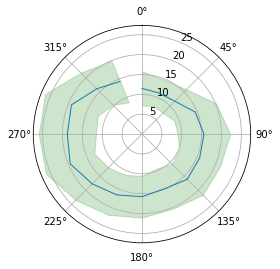

In [28]:
mean = df['wspd'].groupby([df['wind_dir_agg_rad']]).mean()
std = df['wspd'].groupby([df['wind_dir_agg_rad']]).std()
se = 1.0
ub = mean + se * std
lb = mean - se * std
ax = plt.subplot(111, projection='polar')
# plot the shaded range of the confidence intervals
ax.fill_between(ub.index.values, ub, lb, color='green', alpha=.2)
# plot the mean on top
ax.plot(mean, linewidth=1.)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
plt.show()

Much better! We can see that the most strong wind direction was West-SouthWest